In [42]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
%connect_info
%qtconsole

{
  "shell_port": 51748,
  "iopub_port": 51749,
  "stdin_port": 51750,
  "control_port": 51752,
  "hb_port": 51751,
  "ip": "127.0.0.1",
  "key": "4ab576b5-50ce112c171a8582bfa85630",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-5aad29d9-5365-4443-b2ae-d883a0d695e1.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


Import data from csv fies

In [116]:
nextprot_dat = pd.read_csv('../data/nextprot-proteins.csv')
nextprot_dat.head()

,acc_code,protein_name,gene_name_s,chromosome,proteomics,disease,structure,number_isof,number_variants,number_ptms,mutagenesis,tissue_expr,pe
0,A0A024RBG1,Diphosphoinositol polyphosphate phosphohydrola...,NUDT4B,1q21.2,yes,no,no,1,0,0,no,yes,Evidence at protein level
1,A0A075B6H7,Probable non-functional immunoglobulin kappa v...,IGKV3-7,2p11.2,yes,no,no,1,187,1,no,yes,Evidence at protein level
2,A0A075B6H8,Probable non-functional immunoglobulin kappa v...,IGKV1D-42,2p11.2,yes,no,no,1,140,1,no,yes,Evidence at protein level
3,A0A075B6H9,Immunoglobulin lambda variable 4-69,IGLV4-69,22q11.22,yes,no,no,1,318,1,no,yes,Evidence at protein level
4,A0A075B6I0,Immunoglobulin lambda variable 8-61,IGLV8-61,22q11.22,yes,no,no,1,256,1,no,yes,Evidence at protein level


In [251]:
ppi_dat = pd.read_csv('../data/STRING/STRING-interaction-swiss.csv')
ppi_dat.head()

,protein1_acc,protein2_acc,combined_score
0,P84085,Q14123,155
1,P84085,Q13177,197
2,P84085,O95755,222
3,P84085,Q13905,181
4,P84085,Q15057,767


In [539]:
proteins = pd.read_csv('../data/proteins-sample-0981.csv')
proteins = proteins[proteins['protein_accession'].isin(nextprot_dat['acc_code'])]
proteins.head()

,protein_accession,protein_score,protein_avg_mass,protein_matched_products,protein_matched_peptides,protein_digest_peps,protein_seq_cover_percent,protein_matched_peptide_inten_sum,protein_top3matched_peptide_inten_sum,protein_matched_product_inten_sum,protein_auto_curate,protein_sum_num_by_calc,protein_sum_num_by_pep_frag1,protein_num_unique_peptides
0,Q96EG1,0.0,57913.1781,0,1,33,0.0,2767,0.0,339,Green,5.981677,0,0
1,Q8TEX9,0.0,120633.6768,3,1,84,0.0,1469,0.0,488,Red,6.113683,0,0
2,Q0VDD8,0.0,405223.5318,10,3,268,0.0,13319,0.0,2544,Red,19.128590,0,0
3,Q9HCH5,0.0,105285.2734,1,3,85,0.0,130667,0.0,422,Green,28.732410,0,0
4,Q9BYN7,0.0,95001.7193,7,2,43,0.0,3633,0.0,1708,Red,7.312799,0,0


In [540]:
proteins.describe()

,protein_score,protein_avg_mass,protein_matched_products,protein_matched_peptides,protein_digest_peps,protein_seq_cover_percent,protein_matched_peptide_inten_sum,protein_top3matched_peptide_inten_sum,protein_matched_product_inten_sum,protein_sum_num_by_calc,protein_sum_num_by_pep_frag1,protein_num_unique_peptides
count,10628.000000,1.062800e+04,10628.000000,10628.000000,10628.000000,10628.000000,1.062800e+04,1.062800e+04,10628.000000,10628.000000,10628.000000,10628.0
mean,126.834218,8.318720e+04,6.988709,2.125706,55.387561,5.013868,5.208421e+04,6.981194e+03,2580.636714,12.854394,4.344938,0.0
std,574.916775,7.532698e+04,5.472866,1.499351,50.465219,5.842536,1.744397e+05,6.939676e+04,7427.548638,11.681110,3.039798,0.0
min,0.000000,2.391932e+03,0.000000,1.000000,1.000000,0.000000,1.250000e+03,0.000000e+00,0.000000,3.584394,0.000000,0.0
25%,10.581900,3.938988e+04,3.000000,1.000000,26.000000,1.750000,4.299750e+03,0.000000e+00,591.000000,6.651505,3.000000,0.0
50%,26.929400,6.208700e+04,6.000000,2.000000,42.000000,3.150000,1.223550e+04,0.000000e+00,1196.000000,9.408626,3.000000,0.0
75%,76.026575,1.025665e+05,9.000000,3.000000,69.000000,6.020000,3.778425e+04,0.000000e+00,2413.000000,14.720907,5.000000,0.0
max,21668.070000,1.521735e+06,81.000000,27.000000,788.000000,80.260000,6.112216e+06,3.433368e+06,391390.000000,302.534400,65.000000,0.0




## generate protein reference set

In [541]:
# the _2 data was created by first filter with spectral count >= 2 then normalized with NSAF
dat_nasf = pd.read_csv('../data/gastric-primary-cell/gastric_primary_cell_nsaf_2.csv')
dat_nasf.rename(columns={'Unnamed: 0': 'accession'}, inplace=True)
dat_nasf = dat_nasf[dat_nasf['accession'].isin(nextprot_dat['acc_code'])]
dat_nasf.head()

,accession,IP0981_1701,IP0982_1701,IP0993_1701,IP0995_1701,IP0999_1701,IP7100_1701,IP7103_1701,IP7105_1701
108,A0A087WW87,0.000000,110.725205,109.744275,0.0,0.0,0.0,0.000000,0.000000
177,A0A087X0M5,428.425824,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
228,A0A096LP55,0.000000,490.760068,583.694824,0.0,0.0,0.0,775.691708,560.127879
251,A0A0A0MS15,276.016638,0.000000,0.000000,0.0,0.0,0.0,0.000000,142.777695
302,A0A0B4J268,0.000000,81.943424,0.000000,0.0,0.0,0.0,0.000000,0.000000


## generate reference dataset

In [542]:
# protein that is detected in at least half of sample of similar setting are consider as positive proteins
rowsum = np.sum(dat_nasf.iloc[:, ~dat_nasf.columns.isin(['IP0981_1701', 'IP7103_1701'])].values == 0, axis=1)
filter = rowsum >= 3
protein_reference = dat_nasf[filter]['accession']

In [543]:
dat_spc = pd.read_csv('../data/gastric-primary-cell/gastric_primary_cell_count.csv')
dat_spc.rename(columns={'Unnamed: 0': 'accession'}, inplace=True)
dat_spc = dat_spc[dat_spc['accession'].isin(nextprot_dat['acc_code'])]
dat_spc.head()

,accession,IP0981_1701,IP0982_1701,IP0993_1701,IP0995_1701,IP0999_1701,IP7100_1701,IP7103_1701,IP7105_1701
15,A0A075B6R2,0,0,0,0,0,0,1,0
110,A0A087WW87,0,3,2,0,0,0,0,0
181,A0A087X0M5,3,0,0,0,0,0,0,0
236,A0A096LP55,1,10,8,0,0,0,6,6
259,A0A0A0MS15,2,0,0,0,0,0,0,2


Text(0.5, 0.98, 'Spectral count distribution for the primary cell gastric cancer sample')

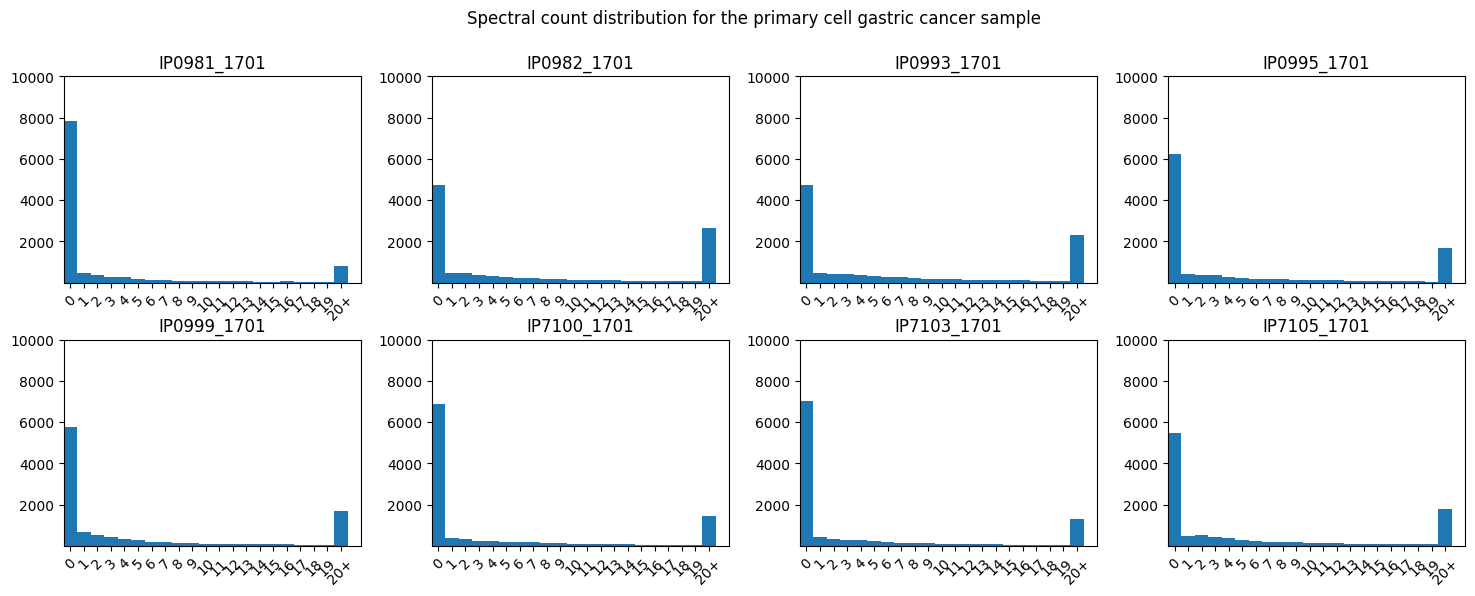

In [544]:
fig, ax = plt.subplots(2, 4, figsize=(15, 6))
fig.suptitle('Spectral count distribution for the primary cell gastric cancer sample')
fig.tight_layout(pad=2)
bins = np.arange(0, 21, 1)
for idx, col in enumerate(dat_spc.columns[1:]):
    first_axis = int(idx / 4)
    second_axis = int(idx % 4)
    sub_ax = ax[first_axis][second_axis]
    _ = sub_ax.set_ylim([1, 10000]);
    _ = sub_ax.hist(np.clip(dat_spc[col], bins[0], bins[-1]), bins=np.arange(0, 22));
    _ = sub_ax.set_title(col);
    _ = sub_ax.set_xlim(0, 22)
    _ = sub_ax.set_xticks(bins + 0.5)
    xlabels = bins[0:].astype(str)
    xlabels[-1] += '+'
    _ = sub_ax.set_xticklabels(xlabels, rotation=45)

Text(0.5, 0.98, 'Spectral count distribution for the primary cell gastric cancer sample')

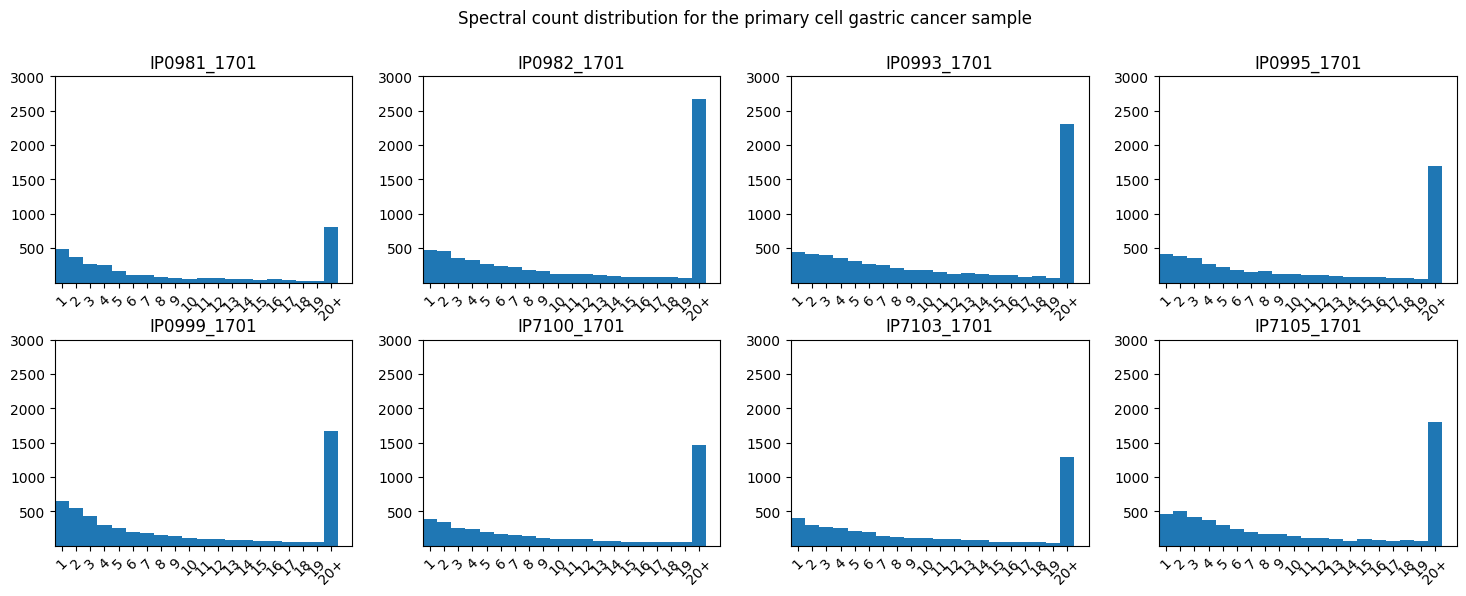

In [545]:
fig, ax = plt.subplots(2, 4, figsize=(15, 6))
fig.suptitle('Spectral count distribution for the primary cell gastric cancer sample')
fig.tight_layout(pad=2)
bins = np.arange(1, 21, 1)
for idx, col in enumerate(dat_spc.columns[1:]):
    first_axis = int(idx / 4)
    second_axis = int(idx % 4)
    sub_ax = ax[first_axis][second_axis]
    _ = sub_ax.set_ylim([1, 3000]);
    _ = sub_ax.hist(np.clip(dat_spc[col][dat_spc[col] != 0], bins[0], bins[-1]), bins=np.arange(1, 22));
    _ = sub_ax.set_title(col);
    _ = sub_ax.set_xlim(1, 22)
    _ = sub_ax.set_xticks(bins + 0.5)
    xlabels = bins[0:].astype(str)
    xlabels[-1] += '+'
    _ = sub_ax.set_xticklabels(xlabels, rotation=45)


Text(0.5, 0.98, 'Spectral count distribution for the primary cell gastric cancer sample')

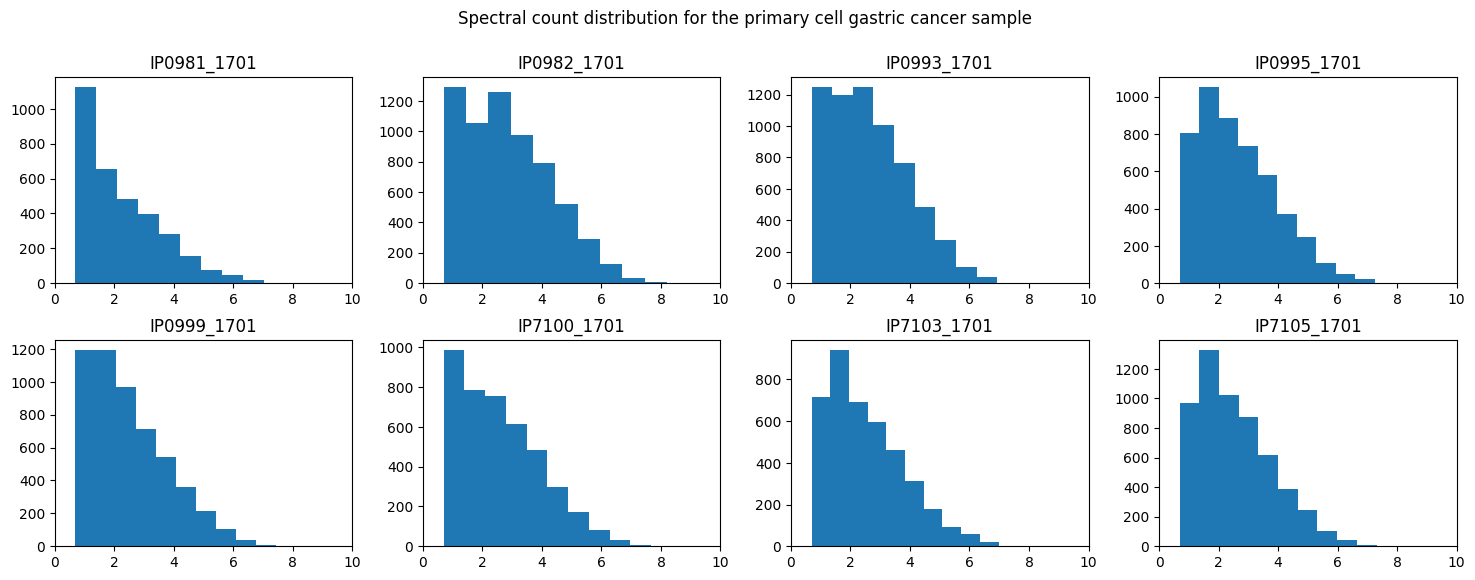

In [546]:
fig, ax = plt.subplots(2, 4, figsize=(15, 6))
fig.suptitle('Spectral count distribution for the primary cell gastric cancer sample')
fig.tight_layout(pad=2)
bins = np.arange(0, 10, 1)
for idx, col in enumerate(dat_spc.columns[1:]):
    first_axis = int(idx / 4)
    second_axis = int(idx % 4)
    sub_ax = ax[first_axis][second_axis]
    # _ = sub_ax.set_ylim([1, 20000]);
    _ = sub_ax.hist(np.log(dat_spc[col][dat_spc[col] != 0] + 1));
    _ = sub_ax.set_title(col);
    _ = sub_ax.set_xlim(0, 10)

In [7]:
protein_reference = pd.read_csv('../data/expressed-protein.csv')
protein_reference.head()

,accession
0,A0A075B6R2
1,A0A087WW87
2,A0A087X0M5
3,A0A096LP55
4,A0A0A0MS15


In [548]:
# use protein reference dataset to create classification label
proteins['expressed'] = proteins.protein_accession.isin(protein_reference).astype(int)
proteins['expressed']
# nrow = proteins.shape[0]
# # proteins.train_masking = [np.repeat(1, 0.6 * nrow), np.repeat(0, 0.6 * nrow)]
# # proteins.train_masking[0: nrow*0.8] = 1
# # proteins. val_masking =
# # proteins.test_masking =

0        0
1        0
2        1
3        1
4        0
        ..
10623    0
10624    0
10625    0
10626    0
10627    0
Name: expressed, Length: 10628, dtype: int64

In [117]:
uniprot_dat = pd.read_table('../data/uniprot_protein_entries.tsv', sep='\t')
uniprot_dat.head()

,Entry,Entry Name,Protein names,Organism,Length,Mass,Gene Names (primary)
0,A0A087X1C5,CP2D7_HUMAN,Putative cytochrome P450 2D7 (EC 1.14.14.1),Homo sapiens (Human),515,57489,CYP2D7
1,A0A0B4J2F0,PIOS1_HUMAN,Protein PIGBOS1 (PIGB opposite strand protein 1),Homo sapiens (Human),54,6313,PIGBOS1
2,A0A0B4J2F2,SIK1B_HUMAN,Putative serine/threonine-protein kinase SIK1B...,Homo sapiens (Human),783,84930,SIK1B
3,A0A0C5B5G6,MOTSC_HUMAN,Mitochondrial-derived peptide MOTS-c (Mitochon...,Homo sapiens (Human),16,2175,MT-RNR1
4,A0A0K2S4Q6,CD3CH_HUMAN,Protein CD300H (CD300 antigen-like family memb...,Homo sapiens (Human),201,21806,CD300H


## augment node attributes with protein information from nextprot

In [550]:
# check all proteins in the protein dataset are nextprot Swiss-Prot proteins
proteins['protein_accession'].isin(nextprot_dat['acc_code']).all()
proteins = proteins.merge(nextprot_dat, how='left', left_on='protein_accession', right_on='acc_code')
proteins = proteins.merge(uniprot_dat, how='left', left_on='protein_accession', right_on='Entry')

True

In [641]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(nextprot_dat['acc_code'])
le.classes_

LabelEncoder()

array(['A0A024RBG1', 'A0A075B6H7', 'A0A075B6H8', ..., 'W5XKT8', 'W6CW81',
       'X6R8D5'], dtype=object)

Transform protein accession to integer ID

In [552]:
# proteins['acc_int_id'] = le.transform(proteins['protein_accession'])
# ppi_dat['protein1_acc_int_id'] = le.transform(ppi_dat['protein1_acc'])
# ppi_dat['protein2_acc_int_id'] = le.transform(ppi_dat['protein2_acc'])

## Proteins in PPI dataset but not in protein dataset
The protein dataset contain protein existence evidence information from an experiment (mostly  calculated protein identification features from MS spectrum)

The number of unique proteins in protein dataset and PPI dataset may not be the same.
We can either: 1. create those new protein entry in the protein dataset
or 2. only use PPI interaction information about proteins that exist in the protein dataset

In [553]:
# use approach 2 for simplicity
ppi_dat = ppi_dat[ppi_dat.protein1_acc.isin(proteins.protein_accession) & ppi_dat.protein2_acc.isin(proteins.protein_accession)]

# Create customized dataset

In [554]:
mapping = {index: i for i, index in enumerate(proteins.protein_accession.unique())}

In [555]:
# import torch
# node_attr = proteins.loc[:, ~proteins.columns.isin(['protein_accession', 'protein_auto_curate', 'chromosome'])]
# node_attr
# node_attr.loc[:, 'protein_score'] = np.log10(node_attr.protein_score + 1)

In [556]:
le_pe_evidence = LabelEncoder()
pe_encoding = le_pe_evidence.fit_transform(proteins['pe'])

le_mutagensis = LabelEncoder()
mutagensis_encoding = le_mutagensis.fit_transform(proteins['mutagenesis'])

le_tissue_expr = LabelEncoder()
tissue_expr_encoding = le_tissue_expr.fit_transform(proteins['tissue_expr'])

In [557]:
# need to define some helper encoder and transformer class

class LogTransformation(object):
    def __init__(self, dtype=None):
        self.dtype = dtype

    def __call__(self, df):
        return torch.from_numpy(np.log10(df.values+ 1)).view(-1, 1).to(self.dtype)

In [633]:
# log_transformer = LogTransformation(dtype=torch.float)
# log_protein_score = log_transformer(node_attr.protein_score)

# to-do: need to standardized features
x1 = proteins.loc[:, ['protein_avg_mass', 'protein_matched_products', 'protein_matched_peptides', 'protein_digest_peps', 'protein_seq_cover_percent', 'protein_matched_peptide_inten_sum',
             'protein_top3matched_peptide_inten_sum', 'protein_matched_product_inten_sum', 'protein_sum_num_by_calc', 'protein_sum_num_by_pep_frag1',
                      'number_isof', 'number_ptms', 'number_variants']].values

x= torch.tensor(np.hstack([x1, pe_encoding[:, np.newaxis], mutagensis_encoding[:, np.newaxis], tissue_expr_encoding[:, np.newaxis]]), dtype=torch.float)

# x = torch.from_numpy(node_attr.to_numpy(dtype=float)).to(dtype=torch.float)
# label variable need to be a (N, ) tensor
expressed = torch.tensor(proteins.expressed.values).view(-1).to(dtype=torch.float)
# x = torch.cat([log_protein_score], dim=-1)
# also need train_masking, test_masking

Create train, val, test masking variable tensor

In [1]:
import torch_geometric.transforms as T
split_transformer = T.RandomNodeSplit(split='train_rest', num_splits=1, num_val=0.2, num_test=0.2)

In [573]:
src = [mapping[index] for index in ppi_dat.protein1_acc]
dst = [mapping[index] for index in ppi_dat.protein2_acc]
edge_index = torch.tensor([src, dst])
edge_index_reverse = torch.tensor([dst, src])
edge_index = torch.cat([edge_index, edge_index_reverse], dim=-1)

In [574]:
edge_attr = torch.tensor(ppi_dat.combined_score.values.repeat(2)).view(-1, 1)

In [575]:
from  torch_geometric.data import Data

In [576]:
# create graph dataset with node features, edge index, and edge attributes
# the ground-truth label need to be fed as an additional variable to use RandomNodeSplit transformer
dataset = Data(x=x, edge_index=edge_index, split=1, edge_attr=edge_attr, y=expressed)
dataset

Data(x=[10628, 16], edge_index=[2, 9877432], edge_attr=[9877432, 1], y=[10628], split=1)

In [577]:
dataset = split_transformer(dataset)
dataset
dataset.x

Data(x=[10628, 16], edge_index=[2, 9877432], edge_attr=[9877432, 1], y=[10628], split=1, train_mask=[10628], val_mask=[10628], test_mask=[10628])

tensor([[5.7913e+04, 0.0000e+00, 1.0000e+00,  ..., 0.0000e+00, 1.0000e+00,
         0.0000e+00],
        [1.2063e+05, 3.0000e+00, 1.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [4.0522e+05, 1.0000e+01, 3.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [2.2435e+04, 2.7000e+01, 3.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.6053e+04, 6.6000e+01, 8.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [2.7335e+04, 5.3000e+01, 4.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])

In [316]:
dataset = data_7103
print(f'Number of nodes: {dataset.num_nodes}')
print(f'Number of node features: {dataset.num_node_features}')
print(f'Number of edges: {dataset.num_edges}')
print(f'Number of edge features: {dataset.num_edge_features}')
print(f'Average node degree: {dataset.num_edges / dataset.num_nodes:.2f}')
print(f'Number of training nodes: {dataset.train_mask.sum()}')
print(f'Training node label rate: {int(dataset.train_mask.sum()) / dataset.num_nodes:.2f}')
print(f'Validation node label rate: {int(dataset.val_mask.sum()) / dataset.num_nodes:.2f}')
print(f'Test node label rate: {int(dataset.test_mask.sum()) / dataset.num_nodes:.2f}')
print(f'Has isolated nodes: {dataset.has_isolated_nodes()}')
print(f'Has self-loops: {dataset.has_self_loops()}')
print(f'Is undirected: {dataset.is_undirected()}')

Number of nodes: 13057
Number of node features: 11
Number of edges: 13210320
Number of edge features: 1
Average node degree: 1011.74
Number of training nodes: 10445
Training node label rate: 0.80
Validation node label rate: 0.10
Test node label rate: 0.10
Has isolated nodes: True
Has self-loops: False
Is undirected: True


In [1048]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, num_classes)

    def forward(self, x):
        # x = F.normalize(x)
        x = self.lin1(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin2(x)
        return x


In [617]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = MLP(num_features=dataset.num_node_features, hidden_channels=16, num_classes=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(dataset.x)  # Perform a single forward pass.
      train_loss = criterion(out[dataset.train_mask], dataset.y[dataset.train_mask])  # Compute the loss solely based on the training nodes.
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      train_correct = pred[dataset.train_mask] == dataset.y[dataset.train_mask]  # Check against ground-truth labels.
      train_acc = int(train_correct.sum()) / int(dataset.train_mask.sum())
      train_loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return float(train_loss.detach()), train_acc


def val():
      model.eval()
      out = model(dataset.x)
      val_loss = criterion(out[dataset.val_mask], dataset.y[dataset.val_mask])
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      val_correct = pred[dataset.val_mask] == dataset.y[dataset.val_mask] # Check against ground-truth labels.
      val_acc = int(val_correct.sum()) / int(dataset.val_mask.sum())  # Derive ratio of correct predictions.
      return float(val_loss.detach()), val_acc

def test():
      model.eval()
      out = model(dataset.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[dataset.test_mask] == dataset.y[dataset.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(dataset.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

train_loss_history = []
train_acc_history = []
val_acc_history = []
val_loss_history = []
for epoch in range(1, 5):
    train_loss, train_acc = train()
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)
    val_loss, val_acc = val()
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)
    print(f'Epoch: {epoch:03d}, Train loss: {train_loss:.4f} Train acc: {train_acc:.4f} '
          f'Validation loss: {val_loss: .4f}, Validation acc: {val_acc:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Train loss: 0.7197 Train acc: 0.3965 Validation loss:  0.7025, Validation acc: 0.3189
Epoch: 002, Train loss: 0.7057 Train acc: 0.4446 Validation loss:  0.6904, Validation acc: 0.5880
Epoch: 003, Train loss: 0.6906 Train acc: 0.4873 Validation loss:  0.6801, Validation acc: 0.6312
Epoch: 004, Train loss: 0.6806 Train acc: 0.5111 Validation loss:  0.6711, Validation acc: 0.6769


Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

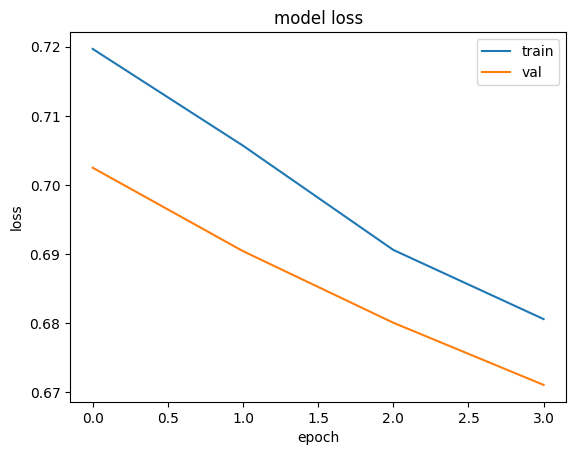

Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'acc')

Text(0.5, 0, 'epoch')

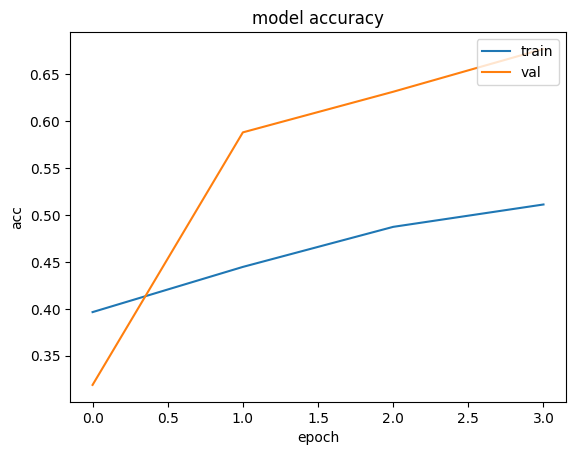

In [618]:
plt.plot(train_loss_history);
plt.plot(val_loss_history);
plt.title('model loss');
plt.ylabel('loss');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper right');
plt.show()

plt.plot(train_acc_history);
plt.plot(val_acc_history);
plt.title('model accuracy');
plt.ylabel('acc');
plt.xlabel('epoch');
plt.legend(['train', 'val'], loc='upper right');
plt.show()

In [620]:
def test():
      model.eval()
      out = model(dataset.x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[dataset.test_mask] == dataset.y[dataset.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(dataset.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

KeyboardInterrupt: 

In [1056]:
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_classes):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        # x = F.normalize(x)
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model = GCN(num_node_features=dataset.num_node_features, hidden_channels=16, num_classes=2)
print(model)

GCN(
  (conv1): GCNConv(16, 16)
  (conv2): GCNConv(16, 2)
)


In [519]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

# uncomment if first time run
# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

1.12.1


GCN(
  (conv1): GCNConv(16, 16)
  (conv2): GCNConv(16, 2)
)

/Users/cgu3/opt/anaconda3/envs/graph-neural-network/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/cgu3/opt/anaconda3/envs/graph-neural-network/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


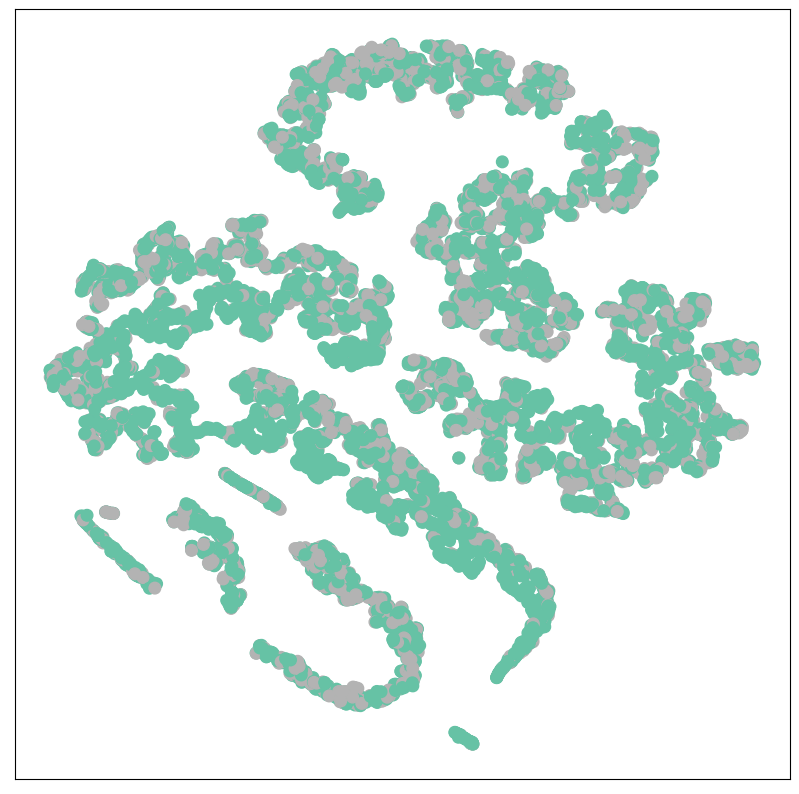

In [520]:
model = GCN(num_node_features=dataset.num_node_features, hidden_channels=16, num_classes=2)
model.eval()

out = model(dataset.x, dataset.edge_index)
visualize(out, color=dataset.y)

In [597]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(num_node_features=dataset.num_node_features, hidden_channels=16, num_classes=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(dataset.x, dataset.edge_index)  # Perform a single forward pass.
      train_loss = criterion(out[dataset.train_mask], dataset.y[dataset.train_mask])  # Compute the loss solely based on the training nodes.
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      train_correct = pred[dataset.train_mask] == dataset.y[dataset.train_mask]  # Check against ground-truth labels.
      train_acc = int(train_correct.sum()) / int(dataset.train_mask.sum())
      train_loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return float(train_loss.detach()), train_acc


def val():
      model.eval()
      out = model(dataset.x, dataset.edge_index)
      val_loss = criterion(out[dataset.val_mask], dataset.y[dataset.val_mask])
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      val_correct = pred[dataset.val_mask] == dataset.y[dataset.val_mask] # Check against ground-truth labels.
      val_acc = int(val_correct.sum()) / int(dataset.val_mask.sum())  # Derive ratio of correct predictions.
      return float(val_loss.detach()), val_acc


train_loss_history = []
train_acc_history = []
val_acc_history = []
val_loss_history = []
for epoch in range(1, 11):
    train_loss, train_acc = train()
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)
    val_loss, val_acc = val()
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)
    print(f'Epoch: {epoch:03d}, Train loss: {train_loss:.4f} Train acc: {train_acc:.4f} '
          f'Validation loss: {val_loss: .4f}, Validation acc: {val_acc:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Train loss: 0.7646 Train acc: 0.3127 Validation loss:  0.7395, Validation acc: 0.3203
Epoch: 002, Train loss: 0.7417 Train acc: 0.3127 Validation loss:  0.7167, Validation acc: 0.3260
Epoch: 003, Train loss: 0.7170 Train acc: 0.3242 Validation loss:  0.6958, Validation acc: 0.4299
Epoch: 004, Train loss: 0.6953 Train acc: 0.4649 Validation loss:  0.6768, Validation acc: 0.6811
Epoch: 005, Train loss: 0.6756 Train acc: 0.6863 Validation loss:  0.6601, Validation acc: 0.6811
Epoch: 006, Train loss: 0.6575 Train acc: 0.6907 Validation loss:  0.6463, Validation acc: 0.6811
Epoch: 007, Train loss: 0.6430 Train acc: 0.6935 Validation loss:  0.6358, Validation acc: 0.6811
Epoch: 008, Train loss: 0.6309 Train acc: 0.6959 Validation loss:  0.6283, Validation acc: 0.6811
Epoch: 009, Train loss: 0.6234 Train acc: 0.6957 Validation loss:  0.6236, Validation acc: 0.6811
Epoch: 010, Train loss: 0.6173 Train acc: 0.6965 Validation loss:  0.6216, Validation acc: 0.6811


In [599]:
def test():
      model.eval()
      out = model(dataset.x, dataset.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      test_correct = pred[dataset.test_mask] == dataset.y[dataset.test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / int(dataset.test_mask.sum())  # Derive ratio of correct predictions.
      return test_acc

test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

KeyboardInterrupt: 

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

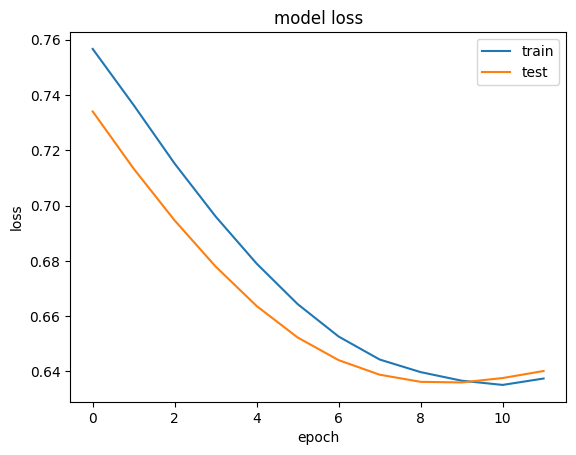

Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'acc')

Text(0.5, 0, 'epoch')

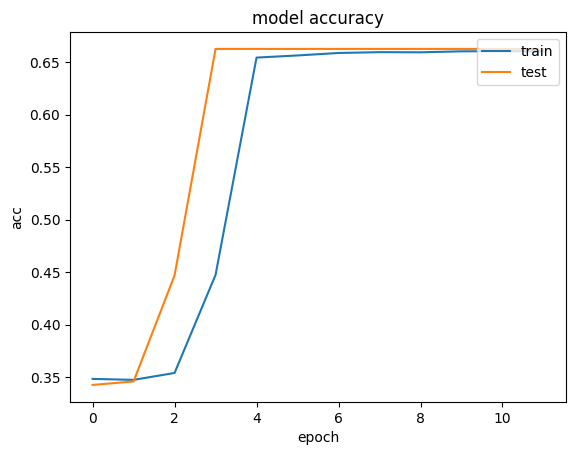

In [523]:
plt.plot(train_loss_history);
plt.plot(val_loss_history);
plt.title('model loss');
plt.ylabel('loss');
plt.xlabel('epoch');
plt.legend(['train', 'test'], loc='upper right');
plt.show()

plt.plot(train_acc_history);
plt.plot(val_acc_history);
plt.title('model accuracy');
plt.ylabel('acc');
plt.xlabel('epoch');
plt.legend(['train', 'test'], loc='upper right');
plt.show()


In [ ]:
model.eval()

out = model(dataset.x, dataset.edge_index)
visualize(out, color=dataset.y)

# Comparison

In [535]:
target_sample = dat_nasf[['accession', 'IP0981_1701']]
target_sample = target_sample[target_sample['IP0981_1701'] > 0]
target_sample

,accession,IP0981_1701
177,A0A087X0M5,428.425824
251,A0A0A0MS15,276.016638
304,A0A0B4J273,293.267677
341,A0A0C4DH31,280.734871
343,A0A0C4DH38,421.102306
...,...,...
7823,Q9Y6N5,2262.723058
7824,Q9Y6N9,89.255380
7826,Q9Y6V7,68.004099
7831,Q9Y6Y8,82.114950


In [591]:
nextprot_proteins_acc = nextprot_dat['acc_code']
negative_reference = nextprot_proteins_acc[~nextprot_proteins_acc.isin(protein_reference)]

In [595]:
# true positive rate (precision)
target_sample['accession'].isin(protein_reference).mean()
# recall
protein_reference.isin(target_sample['accession']).mean()
# true negative rate (specificity)
(~negative_reference.isin(target_sample['accession'])).mean()

0.19359534206695778

0.09097127222982217

0.8472882640755289

In [582]:
# precision
???
# recall
0.67
# specificity

0.3078660143018442

can use it to generate a new score and see if it can bimodal for FDR to discover new  proteins

# Extend to multiple datasets case

In [267]:
import pandas as pd
dat_7103 = pd.read_csv('../data/raw-data/processed-combined-protein/combined_protein_7103_processed.csv', index_col='protein.Accession')
protein_reference = dat_7103.index[dat_7103['protein.falsePositiveRate'] < 5].to_list()

In [111]:
ppi = pd.read_csv('../data/STRING/STRING-interaction-swiss.csv')
protein1 = ppi.protein2_acc.to_list()
protein2 = ppi.protein1_acc.to_list()

Check the number of proteins covered by the interaction database

In [112]:
dat_7103.index.isin(protein1 + protein2).astype(int).mean()

0.9515202573332312

In [8]:

def load_node_csv(path: str, index_col: str, numeric_cols: list, encoders: object=None, protein_reference:'iterable'=None, **kwargs):
    df = pd.read_csv(path, index_col=index_col, **kwargs)
    mapping = {index: i for i, index in enumerate(df.index.unique())}

    # extract feature doesn't need encoder
    x = torch.tensor(df.loc[:, numeric_cols].values, dtype=torch.float)
    if encoders is not None:
        xs = [encoder(df[col]) for col, encoder in encoders.items()]
        x2 = torch.cat(xs, dim=-1).view(-1, 1)
        x = torch.hstack([x, x2])


    # based on protein reference set to create group-true label
    y = df.index.isin(protein_reference).astype(int)
    y = torch.tensor(y).view(-1).to(dtype=torch.long)

    return x, mapping, y

In [9]:
# ? how to encode the same for two data?

# class CategoricalEncoder(object):
#     def __init__(self, device=None):
#         self.device = device
#         self.model = LabelEncoder()
#
#     @torch.no_grad()
#     def __call__(self, df):
#         x = self.model.fit_transform(df)
#         x = torch.tensor(x)
#         return x.to(self.device)

In [10]:
numeric_cols = ['protein.avgMass', 'protein.MatchedProducts', 'protein.matchedPeptides', 'protein.digestPeps', 'protein.seqCover(%)', 'protein.MatchedPeptideIntenSum', 'protein.top3MatchedPeptideIntenSum', 'protein.MatchedProductIntenSum', 'protein.sumNumBYCalc', 'protein.sumNumBYPepFrag1', 'protein.falsePositiveRate']
# numeric_cols = ['protein.matchedPeptides', 'protein.seqCover(%)', 'protein.falsePositiveRate']
#  'protein.falsePositiveRate'

In [16]:
x_0981, mapping_0981, y_0981 = load_node_csv('../data/raw-data/processed-combined-protein/combined_protein_0981_processed.csv', index_col='protein.Accession',  numeric_cols=numeric_cols, protein_reference=protein_reference)

In [354]:
x_7103, mapping_7103, y_7103 = load_node_csv('../data/raw-data/processed-combined-protein/combined_protein_7103_processed.csv', index_col='protein.Accession',numeric_cols=numeric_cols, protein_reference=protein_reference)

In [18]:
import torch
def load_edge_csv(path: str, src_index_col: str, dst_index_col: str, mapping: dict,
                  numeric_cols: list, encoders: dict=None, undirected: bool=True, **kwargs):
    df = pd.read_csv(path, **kwargs)

    # only keep interactions related to proteins that in the protein dataset (i.e. in mapping keys)
    protein_data_acc = mapping.keys()
    df = df[df.protein1_acc.isin(protein_data_acc) & df.protein2_acc.isin(protein_data_acc)]

    src = [mapping[index] for index in df[src_index_col]]
    dst = [mapping[index] for index in df[dst_index_col]]
    edge_index = torch.tensor([src, dst])

    edge_attr = None
    if numeric_cols is not None:
        edge_attr = torch.tensor(df.loc[:, numeric_cols].values, dtype=float)

    if encoders is not None:
        edge_attrs = [encoder(df[col]) for col, encoder in encoders.items()]
        edge_attr = torch.cat(edge_attrs, dim=-1)

    # add reversed edges if the graph is undirected
    if undirected:
        edge_index_reverse = torch.tensor([dst, src])
        edge_index = torch.cat([edge_index, edge_index_reverse], dim=-1)
        edge_attr = torch.vstack([edge_attr, edge_attr])

    return edge_index, edge_attr

In [19]:
# edge_index_0981, edge_attr_0981 = load_edge_csv('../data/STRING/STRING-interaction-swiss.csv', src_index_col='protein1_acc', dst_index_col='protein2_acc', mapping=mapping_0981,
#                numeric_cols=['combined_score'])
edge_index_7103, edge_attr_7103 = load_edge_csv('../data/STRING/STRING-interaction-swiss.csv', src_index_col='protein1_acc', dst_index_col='protein2_acc', mapping=mapping_7103,
               numeric_cols=['combined_score'])

# use the two graph to create a Dataset object

In [355]:
from torch_geometric.data import Data
# data_0981 = Data(x=x_0981, edge_index=edge_index_0981, split=1, edge_attr=edge_attr_0981, y=y_0981)
data_7103 = Data(x=x_7103, edge_index=edge_index_7103, split=1, edge_attr=edge_attr_7103, y=y_7103)

In [53]:
# data_0981

In [356]:
import torch_geometric.transforms as T
split_transformer = T.RandomNodeSplit(split='train_rest', num_splits=1, num_val=0.2, num_test=0.2)
# data_0981 = split_transformer(data_0981)
data_7103 = split_transformer(data_7103)

In [357]:
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

# data_list = [data_7103, data_0981]
data_list = [data_7103]
loader = DataLoader(data_list)

Training

In [58]:
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self, num_node_features, hidden_channels, num_classes):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        # x = F.normalize(x)
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x


In [349]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

def train(model, loader, criterion, optimizer, scheduler=None):
    model.train()
    optimizer.zero_grad()  # Clear gradients.

    total_loss = 0
    total_correct = 0
    total_num_nodes = 0

    for data in loader:

        if (model.__class__.__name__) == 'MLP':
            out = model(data.x)
        else:
            out = model(data.x, data.edge_index)  # Perform a single forward pass.
        loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        total_correct += int((pred[data.train_mask] == data.y[data.train_mask]).sum())  # Check against ground-truth labels.
        total_num_nodes += data.train_mask.sum()
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients
        if scheduler is not None:
            scheduler.step()
        total_loss = loss + total_loss
        acc = total_correct / total_num_nodes

    return total_loss.detach().numpy(), acc


def val(model, loader, criterion):
    model.eval()

    total_loss = 0
    total_correct = 0
    total_num_nodes = 0
    for data in loader:
        if (model.__class__.__name__) == 'MLP':
            out = model(data.x)
        else:
            out = model(data.x, data.edge_index)  # Perform a single forward pass.
        loss = criterion(out[data.val_mask], data.y[data.val_mask])  # Compute the loss solely based on the training nodes.
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        total_correct += int((pred[data.val_mask] == data.y[data.val_mask]).sum())  # Check against ground-truth labels.
        total_num_nodes += data.val_mask.sum()
        total_loss = loss + total_loss

    acc = total_correct/total_num_nodes
    return total_loss.detach().numpy(), acc

def test(model, loader):
    model.eval()

    total_loss = 0
    total_correct = 0
    total_num_nodes = 0
    for data in loader:
        if (model.__class__.__name__) == 'MLP':
            out = model(data.x)
        else:
            out = model(data.x, data.edge_index)  # Perform a single forward pass.
        loss = criterion(out[data.test_mask], data.y[data.test_mask])  # Compute the loss solely based on the training nodes.
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        total_correct += int((pred[data.test_mask] == data.y[data.test_mask]).sum())  # Check against ground-truth labels.
        total_num_nodes += data.test_mask.sum()
        total_loss = loss + total_loss

    acc = total_correct/total_num_nodes
    return total_loss.detach().numpy(), acc




<IPython.core.display.Javascript object>

In [30]:
import sklearn
import numpy as np
weights = sklearn.utils.class_weight.compute_class_weight('balanced', classes=np.unique(data_7103.y), y=data_7103.y.numpy())
weights = torch.tensor(weights, dtype=torch.float)

In [163]:
import torch
import torch.optim
from torch.optim import lr_scheduler
import torch.nn.functional as F

GCN_model = GCN(num_node_features=len(numeric_cols), hidden_channels=2 * len(numeric_cols), num_classes=2)
criterion = torch.nn.CrossEntropyLoss(weight=weights)
sgd = torch.optim.SGD(GCN_model.parameters(), lr=0.001, weight_decay=1e-3)
adam = torch.optim.Adam(GCN_model.parameters(), lr=0.001)
scheduler = lr_scheduler.StepLR(sgd, step_size=30, gamma=0.1)

train_loss_history = []
train_acc_history = []
val_acc_history = []
val_loss_history = []
for epoch in range(1, 100):
    train_loss, train_acc = train(GCN_model, loader=loader, optimizer=adam, criterion=criterion)
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)
    val_loss, val_acc = val(GCN_model, loader=loader, criterion=criterion)
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)

    if (epoch % 10 == 0):
        torch.save({
            'epoch': epoch,
            'model_state_dict': GCN_model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': train_loss},
            f='../data/output/checkpoints' + '_' + str(epoch))

    print(f'Epoch: {epoch:03d}, Train loss: {train_loss:.4f} Train acc: {train_acc:.4f} '
          f'Validation loss: {val_loss: .4f}, Validation acc: {val_acc:.4f}')

Epoch: 001, Train loss: 12090.4346 Train acc: 0.8164 Validation loss:  10754.3164, Validation acc: 0.8063
Epoch: 002, Train loss: 11860.9102 Train acc: 0.8158 Validation loss:  9870.5889, Validation acc: 0.8078
Epoch: 003, Train loss: 11106.0889 Train acc: 0.8149 Validation loss:  9007.3076, Validation acc: 0.8093
Epoch: 004, Train loss: 9831.6523 Train acc: 0.8161 Validation loss:  8157.8623, Validation acc: 0.8086
Epoch: 005, Train loss: 8539.1748 Train acc: 0.8123 Validation loss:  7318.0610, Validation acc: 0.8078
Epoch: 006, Train loss: 7900.8506 Train acc: 0.8102 Validation loss:  6492.0024, Validation acc: 0.8047
Epoch: 007, Train loss: 6795.6318 Train acc: 0.8092 Validation loss:  5695.8535, Validation acc: 0.8063
Epoch: 008, Train loss: 6507.4194 Train acc: 0.8058 Validation loss:  4940.3413, Validation acc: 0.8078
Epoch: 009, Train loss: 5990.2075 Train acc: 0.7999 Validation loss:  4230.7485, Validation acc: 0.8078
Epoch: 010, Train loss: 5362.1626 Train acc: 0.7959 Validati

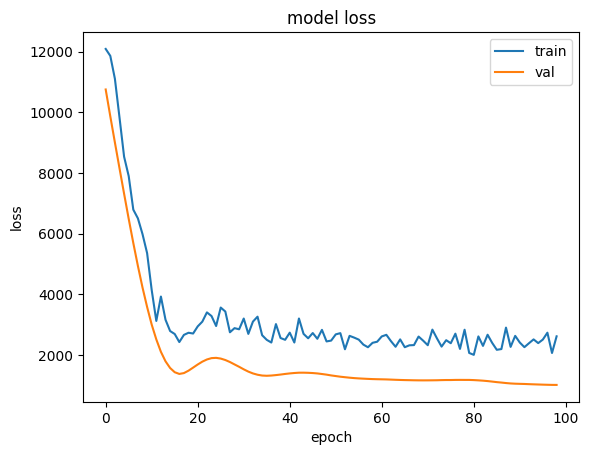

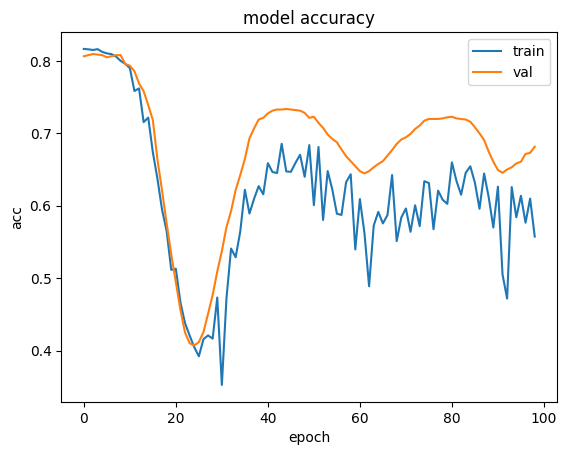

In [164]:
_ = plt.plot(train_loss_history);
_ = plt.plot(val_loss_history);
_ = plt.title('model loss');
_ = plt.ylabel('loss');
_ = plt.xlabel('epoch');
_ = plt.legend(['train', 'val'], loc='upper right');
plt.show()

_ = plt.plot(train_acc_history);
_ = plt.plot(val_acc_history);
_ = plt.title('model accuracy');
_ = plt.ylabel('acc');
_ = plt.xlabel('epoch');
_ = plt.legend(['train', 'val'], loc='upper right');
plt.show()

Check whether model is just major-class guessing

In [263]:
# check output for test node set
checkpoint = torch.load('../data/output/checkpoints_60')
model = GCN(num_node_features=len(numeric_cols), hidden_channels=2 * len(numeric_cols), num_classes=2)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

out = model(data_7103.x, data_7103.edge_index)  # Perform a single forward pass.
pred = out.argmax(dim=1)
pred[data_7103.test_mask].bincount()
data_7103.y[data_7103.test_mask].bincount()

<All keys matched successfully>

tensor([668, 638])

tensor([1069,  237])

In [268]:
from sklearn.metrics import confusion_matrix
label_GNN = pred[data_7103.test_mask].numpy()
label_reference =  data_7103.y[data_7103.test_mask].numpy()
confusion_matrix(label_reference, label_GNN)

array([[598, 471],
       [ 70, 167]])

In [269]:
test_positive = np.where(torch.logical_and(data_7103.test_mask == 1, pred == 1))
inv_map = {v: k for k, v in mapping_7103.items()}
acc_test_positive = [inv_map[idx] for idx in test_positive[0]]

In [270]:
dat_7103.loc[acc_test_positive,:]

,protein.key,protein.Entry,protein.Description,protein.dataBaseType,protein.score,protein.falsePositiveRate,protein.avgMass,protein.MatchedProducts,protein.matchedPeptides,protein.digestPeps,...,protein.top3MatchedPeptideIntenSum,protein.MatchedProductIntenSum,protein.fmolOnColumn,protein.ngramOnColumn,protein.AutoCurate,protein.sumNumBYCalc,protein.sumNumBYPepFrag1,protein.AccessionKey_ForHomologs,protein.Key_ForHomologs,protein.numUniquePeptides
protein.Accession,,,,,,,,,,,,,,,,,,,,,
A0A075B6R2,71948,A0A075B6R2_HUMAN,Protein IGHV4-4 (Fragment) OS=Homo sapiens GN=...,Regular,417.5766,2.87,12989.8105,3,1,5,...,0.0,4825.0,NaN,NaN,Yellow,5.298701,3,NaN,NaN,0
A0A075B759,72018,PAL4E_HUMAN,Peptidyl-prolyl cis-trans isomerase A-like 4E ...,Regular,85.0682,22.52,18481.0184,5,1,12,...,0.0,3252.0,NaN,NaN,Red,7.930114,5,F5H284 P0DN26 Q9Y536,73502 76541 92607,0
A0AV96,72620,RBM47_HUMAN,RNA-binding protein 47 OS=Homo sapiens GN=RBM4...,Regular,165.0407,4.96,64667.5609,3,1,38,...,0.0,704.0,NaN,NaN,Yellow,8.008731,3,A0AV96-2 B7Z8Z7 D6R9D6,7441 10107 14795,0
A2PYH4,72708,HFM1_HUMAN,Probable ATP-dependent DNA helicase HFM1 OS=Ho...,Regular,42.2088,18.28,164101.9752,14,3,129,...,0.0,12259.0,NaN,NaN,Red,31.753470,4,NaN,NaN,0
A2RUC4,72724,TYW5_HUMAN,tRNA wybutosine-synthesizing protein 5 OS=Homo...,Regular,196.4212,7.09,36761.0291,11,3,33,...,0.0,3710.0,NaN,NaN,Yellow,10.101020,8,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9Y673,92787,ALG5_HUMAN,Dolichyl-phosphate beta-glucosyltransferase OS...,Regular,76.6165,2.14,37230.3738,10,2,26,...,0.0,1423.0,NaN,NaN,Yellow,10.231820,8,Q9Y673-2,70200,0
Q9Y6C9,92812,MTCH2_HUMAN,Mitochondrial carrier homolog 2 OS=Homo sapien...,Regular,889.4065,0.03,34112.4287,14,2,27,...,0.0,6296.0,NaN,NaN,Green,14.095900,14,E9PIE4,20072,0
Q9Y6E0,92817,STK24_HUMAN,Serine/threonine-protein kinase 24 OS=Homo sap...,Regular,107.4473,16.78,49663.2426,9,3,40,...,0.0,1763.0,NaN,NaN,Green,9.223144,4,B4DR80 H0Y630 Q5JV98 Q5JV99 Q9Y6E0-2,9514 29569 56325 56326 70222,0


In [271]:
uniprot_dat[uniprot_dat.Entry.isin(acc_test_positive)]

,Entry,Entry Name,Protein names,Organism,Length,Mass,Gene Names (primary)
9,A0AV96,RBM47_HUMAN,RNA-binding protein 47 (RNA-binding motif prot...,Homo sapiens (Human),593,64099,RBM47
46,A2PYH4,HFM1_HUMAN,Probable ATP-dependent DNA helicase HFM1 (EC 3...,Homo sapiens (Human),1435,162610,HFM1
54,A2RUC4,TYW5_HUMAN,tRNA wybutosine-synthesizing protein 5 (hTYW5)...,Homo sapiens (Human),315,36548,TYW5
75,A5LHX3,PSB11_HUMAN,Proteasome subunit beta type-11 (EC 3.4.25.1) ...,Homo sapiens (Human),300,32530,PSMB11
90,A6NDG6,PGP_HUMAN,Glycerol-3-phosphate phosphatase (G3PP) (EC 3....,Homo sapiens (Human),321,34006,PGP
...,...,...,...,...,...,...,...
19908,Q9BRP1,PDD2L_HUMAN,Programmed cell death protein 2-like,Homo sapiens (Human),358,39417,PDCD2L
19917,Q9BX51,GGTL1_HUMAN,Glutathione hydrolase light chain 1 (Gamma-glu...,Homo sapiens (Human),225,24274,GGTLC1
19943,Q9H1X3,DJC25_HUMAN,DnaJ homolog subfamily C member 25,Homo sapiens (Human),360,42404,DNAJC25
19997,Q9P1F3,ABRAL_HUMAN,Costars family protein ABRACL (ABRA C-terminal...,Homo sapiens (Human),81,9056,ABRACL


In [272]:
dat_7103 = dat_7103.merge(uniprot_dat, left_index=True, right_on='Entry')

In [273]:
dat_7103_test_positive = dat_7103[dat_7103.Entry.isin(acc_test_positive)]
dat_7103_test_positive_short = dat_7103_test_positive.loc[:, ['Gene Names (primary)', 'protein.matchedPeptides']]

In [274]:
rna_dat = pd.read_csv('../data/RNA/TPM_gastric_cancer_primary_cell.csv', index_col=0, header=0)
rna_dat.head()

,IP0981_1701,IP0982_1701,IP0993_1701,IP0995_1701,IP0999_1701,IP7100_1701,IP7103_1701,IP7105_1701
A1BG,0.121445,0.973642,1.899031,8.080447,0.890998,2.006780,2.514704,3.400409
A1BG-AS1,0.696011,1.373207,8.956204,137.332073,5.648928,45.003946,7.205980,7.011729
A1CF,3.608865,5.067146,7.310695,0.000000,6.431744,1.547249,0.000000,6.306374
A2M,6.777727,3.250278,606.620777,6.089779,34.548676,678.042653,0.287000,525.346005
A2M-AS1,0.859071,3.443644,10.696843,2.846998,18.067694,24.687715,27.670778,2.166991


In [275]:
dat_7103_tpm_ms = dat_7103_test_positive_short.merge(rna_dat['IP7103_1701'], left_on='Gene Names (primary)', right_index=True)
dat_7103_tpm_ms.rename(columns={'IP7103_1701': 'TPM'}, inplace=True)
dat_7103_tpm_ms['TPM'] = np.log(dat_7103_tpm_ms['TPM'] + 1)
dat_7103_tpm_ms.head()

,Gene Names (primary),protein.matchedPeptides,TPM
14285,IGHV4-4,1,0.000000
16404,PPIAL4E,1,0.000000
9,RBM47,1,1.178374
46,HFM1,3,0.000000
54,TYW5,3,1.476507


In [276]:
dat_7103_tpm_ms.shape
(dat_7103_tpm_ms['TPM'] > 0).sum()

(613, 3)

522

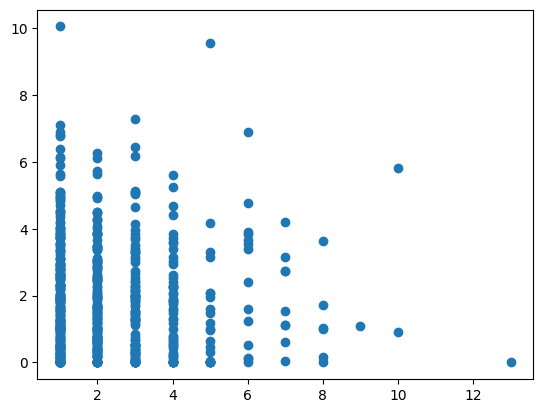

In [277]:
plt.scatter(dat_7103_tpm_ms['protein.matchedPeptides'], dat_7103_tpm_ms['TPM'])

In [290]:
acc_test = np.where(data_7103.test_mask == 1)
inv_map = {v: k for k, v in mapping_7103.items()}
acc_test = [inv_map[idx] for idx in acc_test[0]]

In [306]:
dat_7103_test = dat_7103[dat_7103.Entry.isin(acc_test)]
dat_7103_fdr_40 = dat_7103_test[dat_7103_test['protein.falsePositiveRate'] < 20]
# check the intersectio between GNN prediction and FDR predition
len(set(dat_7103_fdr_40.Entry).intersection(set(dat_7103_test_positive.Entry)))
dat_7103_fdr_40_short = dat_7103_fdr_40[['Gene Names (primary)', 'protein.matchedPeptides']]
dat_7103_fdr_40_short

365

,Gene Names (primary),protein.matchedPeptides
14285,IGHV4-4,1
9,RBM47,1
42,MACROD2,2
46,HFM1,3
54,TYW5,3
...,...,...
16354,MTCH2,2
14208,STK24,3
14249,CDH10,1
14260,FCGBP,2


In [307]:
dat_7103_fdr_40_short = dat_7103_fdr_40_short.merge(rna_dat['IP7103_1701'], left_on='Gene Names (primary)', right_index=True)
dat_7103_fdr_40_short.rename(columns={'IP7103_1701': 'TPM'}, inplace=True)
dat_7103_fdr_40_short['TPM'] = np.log(dat_7103_fdr_40_short['TPM'] + 1)


In [308]:
(dat_7103_fdr_40_short['TPM'] > 0).sum()

491

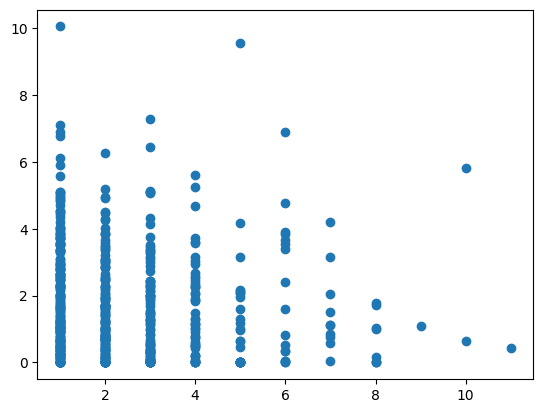

In [309]:
plt.scatter(dat_7103_fdr_40_short['protein.matchedPeptides'], dat_7103_fdr_40_short['TPM'])

ROC AUC

Text(0.5, 1.0, 'Test ROC')

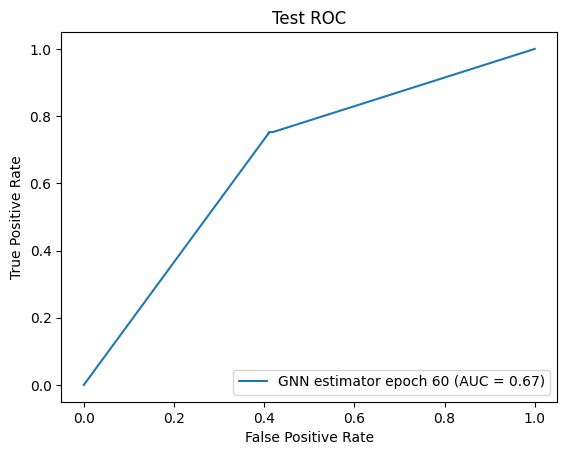

In [173]:
from sklearn import metrics
probabilities = F.softmax(out[data_7103.test_mask], dim=1)[:, 1]
y_score = probabilities.detach().numpy()
fpr, tpr, thresholds = metrics.roc_curve(data_7103.y[data_7103.test_mask], y_score)
roc_auc = metrics.auc(fpr, tpr)
 # Plotting
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='GNN estimator epoch ' + str(epoch))
roc_display.plot()
plt.title('Test ROC')
plt.show()

In [65]:
fpr, tpr, thresholds

(array([0.        , 0.33676333, 0.33956969, 0.34050514, 0.34518241,
        0.34798877, 0.34892423, 0.35079514, 0.3536015 , 0.3536015 ,
        0.3554724 , 0.3554724 , 0.35734331, 0.35734331, 0.36295603,
        0.36295603, 0.37324602, 0.37324602, 0.37418148, 0.37418148,
        0.37698784, 0.37698784, 0.38072965, 0.38072965, 0.3919551 ,
        0.3919551 , 0.39289055, 0.39289055, 0.39663237, 0.39663237,
        0.40037418, 0.42095416, 0.44153414, 0.44153414, 0.46211413,
        0.46211413, 0.46585594, 0.46585594, 0.47146866, 0.47146866,
        0.4808232 , 0.4808232 , 0.48269411, 0.48269411, 0.49391955,
        0.49391955, 0.49766137, 0.49766137, 0.49859682, 0.49859682,
        0.50888681, 0.50888681, 0.51730589, 0.51730589, 0.52385407,
        0.52385407, 0.53507951, 0.53507951, 0.53788587, 0.53788587,
        0.53882133, 0.53882133, 0.53975678, 0.53975678, 0.54630496,
        0.54630496, 0.55098223, 0.55098223, 0.55940131, 0.55940131,
        0.56407858, 0.56407858, 0.56501403, 0.56

In [23]:
import networkx as nx
from torch_geometric import utils
import matplotlib.pyplot as plt
G = utils.to_networkx(data_7103)

In [332]:
from torch_geometric.utils import subgraph
subgraph_7103 = subgraph(test_positive, edge_index=edge_index_7103)
subgraph_7103  =Data(edge_index=subgraph_7103[0])

In [333]:
G_subset = utils.to_networkx(subgraph_7103)

/Users/cgu3/opt/anaconda3/envs/graph-neural-network/lib/python3.10/site-packages/torch_geometric/data/storage.py:292: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


In [335]:
nx.draw_kamada_kawai(G_subset)

KeyboardInterrupt: 

In [27]:
import torch
from torch.nn import Linear
import torch.nn.functional as F


class MLP(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super().__init__()
        torch.manual_seed(12345)
        self.lin1 = Linear(num_features, hidden_channels)
        self.lin2 = Linear(hidden_channels, hidden_channels)
        self.lin3 = Linear(hidden_channels, num_classes)

    def forward(self, x):
        # x = F.normalize(x) # normalize make bad result why?
        x = self.lin1(x)
        x = x.relu()
        x = self.lin2(x)
        x = x.relu()
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin3(x)
        return x

In [358]:
# model = GCN(num_node_features=7, hidden_channels=16, num_classes=2)
MLP_model = MLP(num_features=len(numeric_cols), hidden_channels=2 * len(numeric_cols), num_classes=2)
optimizer = torch.optim.Adam(MLP_model.parameters(), lr=0.0005)
criterion = torch.nn.CrossEntropyLoss(weight=weights, reduction='mean')

train_loss_history = []
train_acc_history = []
val_acc_history = []
val_loss_history = []
for epoch in range(1, 201):
    train_loss, train_acc = train(MLP_model, optimizer=optimizer, loader=loader, criterion=criterion)
    train_loss_history.append(train_loss)
    train_acc_history.append(train_acc)
    val_loss, val_acc = val(MLP_model, loader=loader, criterion=criterion)
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)

    if (epoch % 20 == 0):
        torch.save({
            'epoch': epoch,
            'model_state_dict': MLP_model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': train_loss},
            f='../data/output/checkpoints' + '_MLP_' + str(epoch))

    print(f'Epoch: {epoch:03d}, Train loss: {train_loss:.4f} Train acc: {train_acc:.4f} '
          f'Validation loss: {val_loss: .4f}, Validation acc: {val_acc:.4f}')

Epoch: 001, Train loss: 3233.4941 Train acc: 0.4854 Validation loss:  613.4859, Validation acc: 0.3654
Epoch: 002, Train loss: 3147.5203 Train acc: 0.4952 Validation loss:  614.8870, Validation acc: 0.3715
Epoch: 003, Train loss: 2956.4939 Train acc: 0.4923 Validation loss:  621.1808, Validation acc: 0.3784
Epoch: 004, Train loss: 2820.3760 Train acc: 0.4924 Validation loss:  626.4462, Validation acc: 0.3949
Epoch: 005, Train loss: 2910.4194 Train acc: 0.4810 Validation loss:  630.9713, Validation acc: 0.4064
Epoch: 006, Train loss: 2685.2061 Train acc: 0.5008 Validation loss:  633.2243, Validation acc: 0.4221
Epoch: 007, Train loss: 2516.7048 Train acc: 0.5001 Validation loss:  632.8481, Validation acc: 0.4404
Epoch: 008, Train loss: 2365.6235 Train acc: 0.5048 Validation loss:  631.2827, Validation acc: 0.4584
Epoch: 009, Train loss: 2341.7891 Train acc: 0.5095 Validation loss:  630.9155, Validation acc: 0.4860
Epoch: 010, Train loss: 2405.7322 Train acc: 0.4934 Validation loss:  631

KeyboardInterrupt: 

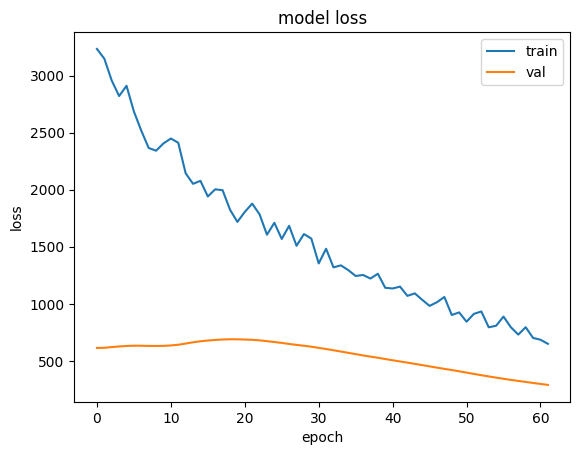

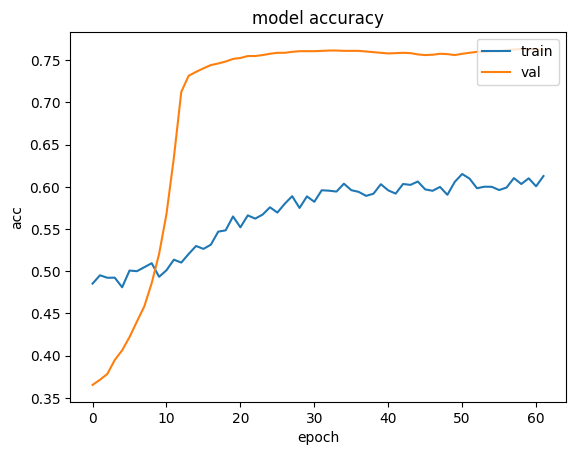

In [359]:
_ = plt.plot(train_loss_history);
_ = plt.plot(val_loss_history);
_ = plt.title('model loss');
_ = plt.ylabel('loss');
_ = plt.xlabel('epoch');
_ = plt.legend(['train', 'val'], loc='upper right');
plt.show()

_ = plt.plot(train_acc_history);
_ = plt.plot(val_acc_history);
_ = plt.title('model accuracy');
_ = plt.ylabel('acc');
_ = plt.xlabel('epoch');
_ = plt.legend(['train', 'val'], loc='upper right');
plt.show()


In [56]:
# check output for test node set
checkpoint = torch.load('../data/output/checkpoints_MLP_100')
model = MLP(num_features=len(numeric_cols), hidden_channels=2 * len(numeric_cols), num_classes=2)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

out = model(data_7103.x)  # Perform a single forward pass.
pred = out.argmax(dim=1)
pred.bincount()
data_7103.y.bincount()

# (pred[data_0981.test_mask] == data_0981.y[data_0981.test_mask]).float().mean()

<All keys matched successfully>

tensor([7166, 5891])

tensor([10821,  2236])

Text(0.5, 1.0, 'Test ROC')

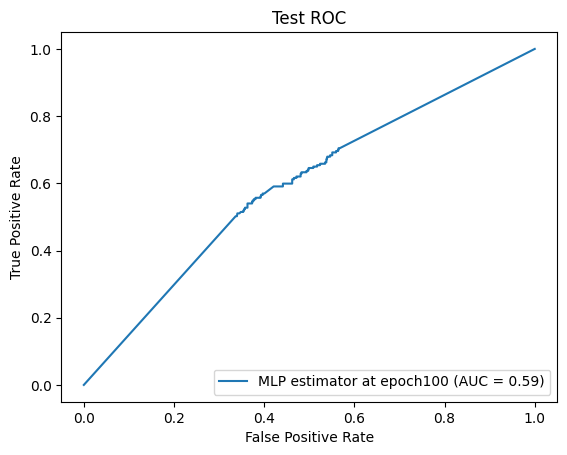

In [55]:
from sklearn import metrics
probabilities = F.softmax(out[data_7103.test_mask], dim=1)[:, 1]
y_score = probabilities.detach().numpy()
fpr, tpr, thresholds = metrics.roc_curve(data_7103.y[data_7103.test_mask], y_score)
roc_auc = metrics.auc(fpr, tpr)
 # Plotting
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='MLP estimator at epoch' + str(epoch))
roc_display.plot()
plt.title('Test ROC')
plt.show()